In [1]:
import pandas as pd 


In [2]:
df = pd.read_csv("/content/BlackFriday.csv")


In [3]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115423 entries, 0 to 115422
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     115423 non-null  int64  
 1   Product_ID                  115423 non-null  object 
 2   Gender                      115423 non-null  object 
 3   Age                         115423 non-null  object 
 4   Occupation                  115423 non-null  int64  
 5   City_Category               115423 non-null  object 
 6   Stay_In_Current_City_Years  115423 non-null  object 
 7   Marital_Status              115423 non-null  int64  
 8   Product_Category_1          115423 non-null  int64  
 9   Product_Category_2          79556 non-null   float64
 10  Product_Category_3          35305 non-null   float64
 11  Purchase                    115422 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.6+ MB


In [7]:
# sum of null values

df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            35867
Product_Category_3            80118
Purchase                          1
dtype: int64

In [8]:
# delete the columns
# drop null values

del df['Product_Category_2']
del df['Product_Category_3']

In [13]:
df1 = df.dropna()

In [14]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0
...,...,...,...,...,...,...,...,...,...,...
115417,1005812,P00302742,F,26-35,7,A,1,1,8,5865.0
115418,1005812,P00044142,F,26-35,7,A,1,1,8,9870.0
115419,1005812,P00024742,F,26-35,7,A,1,1,8,6071.0
115420,1005812,P00300642,F,26-35,7,A,1,1,5,5218.0


In [15]:
df1.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

In [17]:
# User id 
df['User_ID'].nunique()

5840

In [19]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1005521, 1005656, 1005800])

In [20]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [21]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
df1['Purchase'].sum()/len(df1['Purchase'])

9301.27737346433

In [24]:
for column in df1.columns:
    print(column, ":" ,df1[column].nunique())

User_ID : 5840
Product_ID : 3354
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 14343


In [28]:
# Analysing Gender
for column in df.columns:
    print(df[column].nunique(), "\t: ", column)

5840 	:  User_ID
3354 	:  Product_ID
2 	:  Gender
7 	:  Age
21 	:  Occupation
3 	:  City_Category
5 	:  Stay_In_Current_City_Years
2 	:  Marital_Status
18 	:  Product_Category_1
14343 	:  Purchase


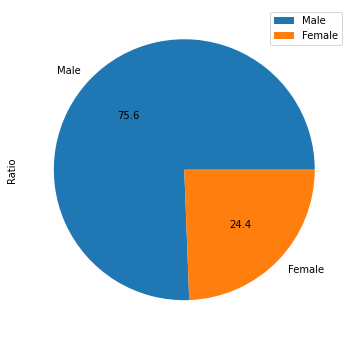

In [29]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, 
                    index = ['Male', 'Female'])

data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = "%.1f")

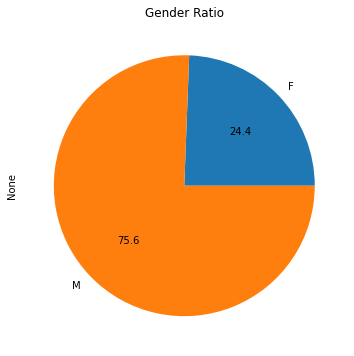

In [30]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 autopct = "%.1f",
                                 title = 'Gender Ratio',
                                 figsize = (6,6))

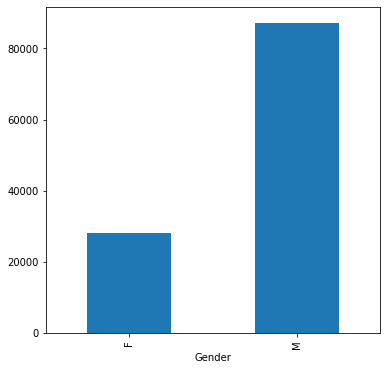

In [31]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

In [32]:

df.groupby('Gender').size()

Gender
F    28159
M    87264
dtype: int64

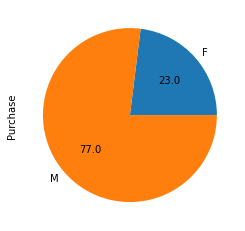

In [33]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

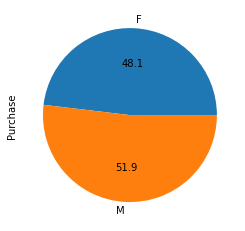

In [34]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

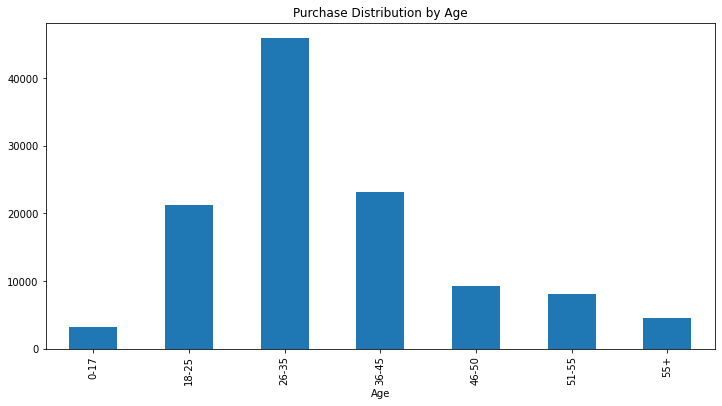

In [35]:
# Analysing Age & Marital

df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

In [36]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])

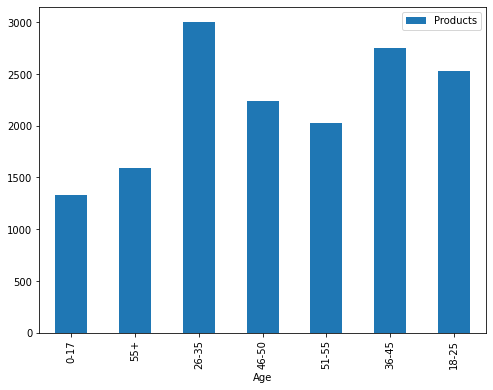

In [37]:
data.plot.bar(x = 'Age', figsize = (8,6))

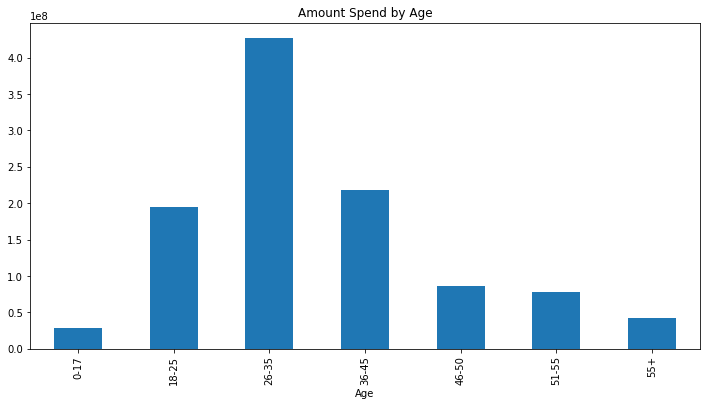

In [38]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', 
                                         figsize = (12, 6), 
                                         title = 'Amount Spend by Age')

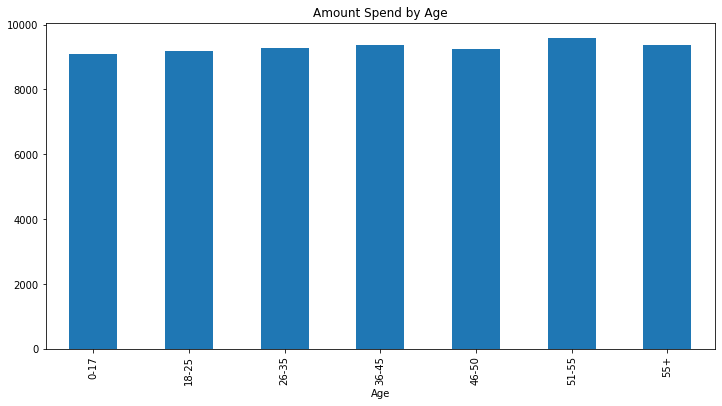

In [39]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar',
                                          figsize = (12, 6),
                                          title = 'Amount Spend by Age')

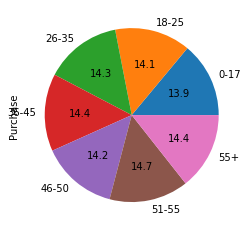

In [40]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

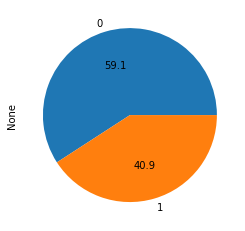

In [41]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = '%0.1f')

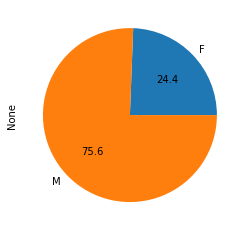

In [42]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = '%0.1f')